# Mobile Price Classification


### Meet Bob
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

> **Notice**: In this problem you do not have to predict actual price but a price range indicating how high the price is.

---

## Target
In this project,on the basis of the mobile specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram, etc. we are predicting Price range of the mobile.

## About the Dataset
- **battery_power**: Total energy a battery can store in one time measured in mAh
- **blue**: Has bluetooth or not
- **clock_speed**: Speed at which microprocessor executes instructions
- **dual_sim**: Has dual sim support or not
- **fc**: Front Camera mega pixels
- **four_g**: Has 4G or not
- **int_memory**: Internal Memory in Gigabytes
- **m_dep**: Mobile Depth in cm
- **mobile_wt**: Weight of mobile phone
- **n_cores**: Number of cores of processor
- **pc**: Primary Camera mega pixels
- **px_height**: Pixel Resolution Height
- **px_width**: Pixel Resolution Width
- **ram**: Random Access Memory in Megabytes
- **sc_h**: Screen Height of mobile in cm
- **sc_w**: Screen Width of mobile in cm
- **talk_time**: Longest time that a single battery charge will last when you are
- **three_g**: Has 3G or not
- **touch_screen**: Has touch screen or not
- **wifi**: Has wifi or not

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Data Preprocessing

In [2]:
data = pd.read_csv('./input/train.csv')

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [5]:
# Check if this data contains missing values
data.isnull().sum().max()

0

In [6]:
data['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

**To sum up**: The dataset is already well-balanced and does not contain any missing values.

## Exploring Data

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


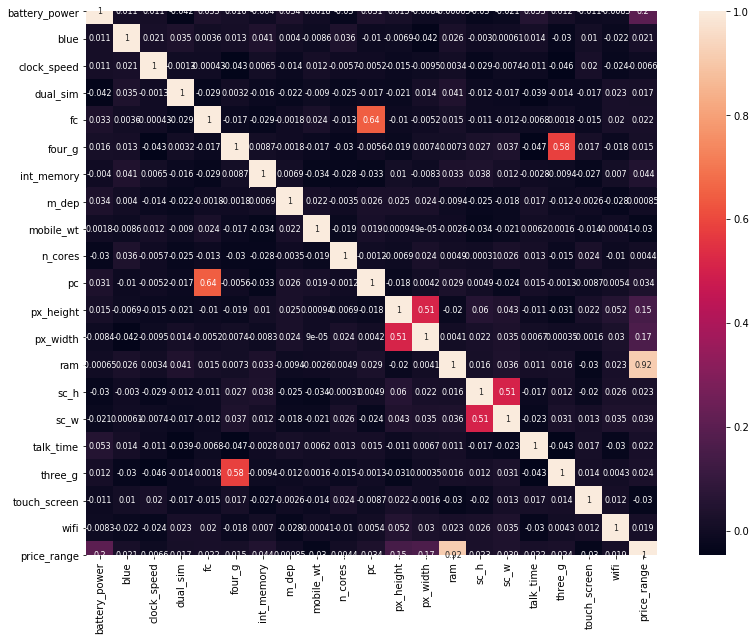

In [8]:
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, square=True, annot=True, annot_kws={'size':8})

#### Low positive correlation: 
- `pc` and `fc`
- `three_g` and `four_g`
- `px_width` and `px_height`
- `sc_w` and `sc_height`

#### High positive correlation:
- `ram` and `price_range`.


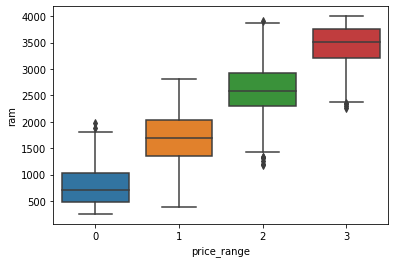

In [9]:
sns.boxplot(data['price_range'], data['ram'])
plt.show()

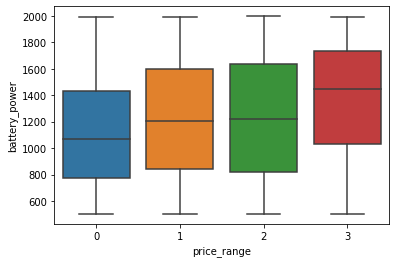

In [13]:
sns.boxplot(data['price_range'], data['battery_power'])
plt.show()

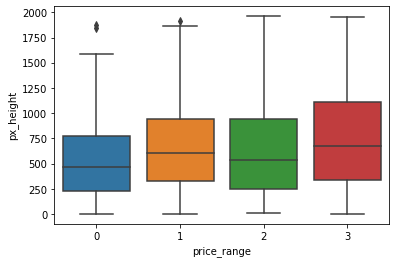

In [16]:
sns.boxplot(data['price_range'], data['px_height'])
plt.show()

## Preparing Data for Classification

In [36]:
X = data.drop(columns='price_range')
y = data['price_range']

### Feature Selection
- Eliminate non-numerical
- Eliminate non-ordinal
- Eliminate features that have missing values
- Eliminate low variance features (since they do not carry much information)

In [37]:
X.var()

battery_power    1.930884e+05
blue             2.501001e-01
clock_speed      6.658629e-01
dual_sim         2.500348e-01
fc               1.884813e+01
four_g           2.496626e-01
int_memory       3.292670e+02
m_dep            8.318353e-02
mobile_wt        1.253136e+03
n_cores          5.234197e+00
pc               3.677592e+01
px_height        1.969414e+05
px_width         1.867964e+05
ram              1.176644e+06
sc_h             1.775143e+01
sc_w             1.897820e+01
talk_time        2.985481e+01
three_g          1.817086e-01
touch_screen     2.501161e-01
wifi             2.500760e-01
dtype: float64

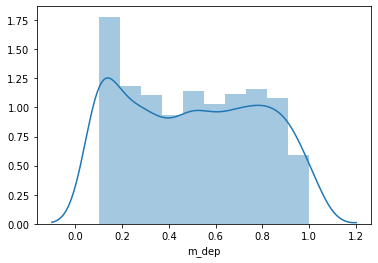

In [38]:
sns.distplot(X['m_dep'])

In [39]:
# Remove non-ordinal
X = X.drop(columns=['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'])
# Remove low variance
X = X.drop(columns=['m_dep', 'clock_speed'])


# X = X[['ram']] # Using ram features only
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
battery_power    2000 non-null int64
fc               2000 non-null int64
int_memory       2000 non-null int64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
dtypes: int64(12)
memory usage: 187.6 KB


### Train/Test Split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Scaling the Features
Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem.

If left alone, these algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, 5kg and 5000gms. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.

To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.

Since both of KNN and SVM utitlize distance calculation behind the scene, we need to scale our features so that the large-valued features do not dominate the other features. More can be referenced [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e) and [here](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#about-standardization).

**Notice**: It is worth trying not scaling the features. So that we can see that for SVM,
- The training time is very long (computationally expensive)
- The model overfits

### Multiple ways to scale
- **Standard Scaler (Standardization)**: Scale the feature by shifting the mean back to 0 and variance to 1. By this way, we only shift the mean value to 0 and keep the distribution the same. Furthermore, this way can presereve the outliers in case they can contribute additional information to the problem.
- **Min-max Scaler (Normalization)**: This one scales the range of values to between 0 and 1 and also eliminates the outliers.
- Read more:
    - Python machine Learning - SebastianRaschka
    - [Medium - Why, How and When to scale your features ?](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e)
    - [Quora](https://www.quora.com/When-should-you-perform-feature-scaling-and-mean-normalization-on-the-given-data-What-are-the-advantages-of-these-techniques)
    - [Kaggle - Very good notebook](https://www.kaggle.com/rtatman/data-cleaning-challenge-scale-and-normalize-data?scriptVersionId=2945378)
    - [statsStackExchange - Scaling ruins the result](https://stats.stackexchange.com/questions/172795/scaling-for-svm-destroys-my-results)
    - [GeeksforGeeks - How and when to apply Scaling](https://www.geeksforgeeks.org/python-how-and-where-to-apply-feature-scaling/)

**Question here is:** 
- Which one keeps the original distribution of the data ?
    - Ans: Both
    
### More about Standardization and Normalization
- [StatisticsHowTo - Standardized Data](https://www.statisticshowto.datasciencecentral.com/standardized-values-examples/)
- [StatisticsHowTo - Normalized Data](https://www.statisticshowto.datasciencecentral.com/normalized/)

### Multiple ways to process the scaling
- Fit the scaler on the whole dataset, scale the whole dataset and then train/test split
- Train/test split and Fit the scaler (to obtain `mean` and `std`) to training set and then scale both training + testing set
- Train/test split and Fit 2 different scalers on the training and testing set and scale them.
- **The correct way is:** the 2nd answer.

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Normalize Training Data 
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

#Converting numpy array to dataframe
X_train_std_df = pd.DataFrame(X_train_std, index=X_train.index, columns=X_train.columns)
X_test_std_df = pd.DataFrame(X_test_std, index=X_test.index, columns=X_test.columns) 

In [42]:
X_train_std_df.head()

,battery_power,fc,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
668,0.984823,-0.066906,-1.156036,-0.451426,0.646912,-0.312840,-0.841894,0.512558,1.507969,0.645076,0.043393,0.176984
1345,-0.673224,-0.766578,1.044235,0.114337,-1.102237,0.849672,-1.018037,-0.852864,0.724930,1.120599,-1.094793,-0.937146
373,-0.400668,-0.999802,1.429282,-0.140256,1.084199,-1.641426,-1.275477,-1.329604,-1.295786,-0.068208,0.726305,0.919738
1388,1.545834,-0.300130,1.704316,-0.819173,-1.102237,0.019306,-1.178372,-1.318033,1.189631,0.169554,-0.639519,1.476803
132,-1.359156,-0.766578,0.494167,1.613611,1.084199,0.019306,-0.715433,-1.563346,0.767924,-0.068208,0.726305,-1.308523


In [43]:
train_std_data = pd.concat([X_train_std_df, y_train], axis=1)
train_std_data.var().sort_values()

fc               1.000625
sc_h             1.000625
sc_w             1.000625
int_memory       1.000625
px_height        1.000625
battery_power    1.000625
pc               1.000625
ram              1.000625
n_cores          1.000625
px_width         1.000625
talk_time        1.000625
mobile_wt        1.000625
price_range      1.278285
dtype: float64

## KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

### Tuning using K-fold Cross Validation

We can tune using only Train/Validation set, but there are still problems:
- We use less training data
- The model can potentially overfit to validation data, because:
    - It is optimized based on validation data.
    - Validation data can be only a small subset -> Cannot represent the population distribution.
    
**Solution**: A smart way is using `K-Fold CV`

In [45]:
from sklearn.model_selection import cross_val_score

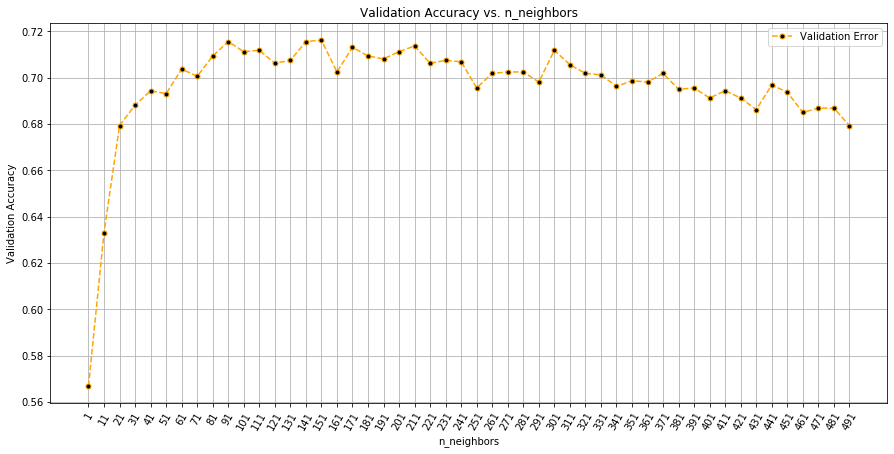

In [46]:
def plot_validation(param_grid, clf, X_train, y_train):
    val_error_rate = []

    for key in param_grid.keys():
        param_range = param_grid[key]
        for param in param_range:
            # https://stackoverflow.com/questions/337688/dynamic-keyword-arguments-in-python
            val_error = cross_val_score(clf.set_params(**{key: param}), X_train, y_train, cv=5).mean()
            val_error_rate.append(val_error)

        plt.figure(figsize=(15,7))
        plt.plot(param_range, val_error_rate, color='orange', linestyle='dashed', marker='o',
                 markerfacecolor='black', markersize=5, label='Validation Error')

        plt.xticks(np.arange(param_range.start, param_range.stop, param_range.step), rotation=60)
        plt.grid()
        plt.legend()
        plt.title('Validation Accuracy vs. {}'.format(key))
        plt.xlabel(key)
        plt.ylabel('Validation Accuracy')
        plt.show()
    

neighbors_range = range(1,500,10)
param_grid = {'n_neighbors': neighbors_range}
plot_validation(param_grid, knn, X_train_std_df, y_train)

In [47]:
best_k = 131

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_std_df, y_train)
knn.score(X_test_std_df, y_test)

0.6975

In [48]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8925

#### Observation for KNN
The model seemed to be overfitting a little. It is worth noting that for KNN, if we do not scale the features, the model performed much better. This reason for this is because the `ram` feature may contributes a lot towards the target. Also, the scale of `ram` is much bigger comparing to other features (based on median, min, max values and std).

## SVM

In [51]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')

**Recall**: The **C** parameter tells the SVM optimization how much you want to avoid misclassifying each training example. 
- For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. 
- Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.

Thus for a very large value of C probably leads to overfitting of the model and for a very small value of C probably leads to underfitting. Thus the value of C must be chosen in such a way that it generalises the unseen data well.


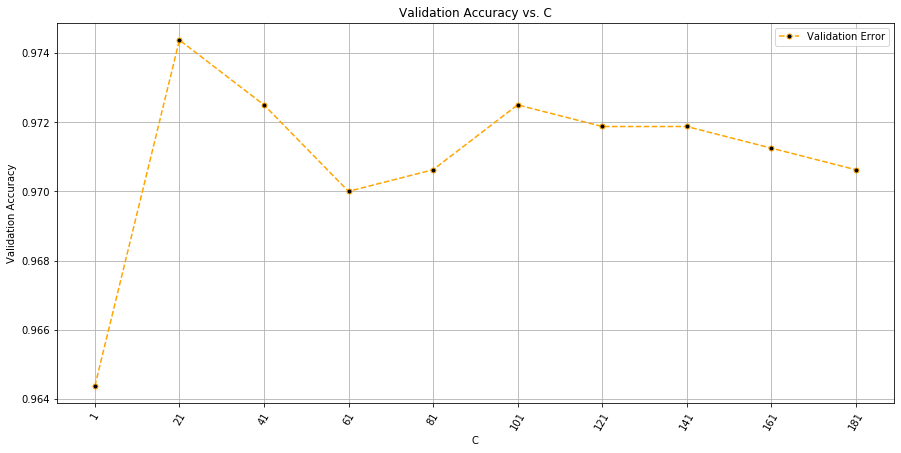

In [52]:
c_range =  range(1,200,20)
param_grid = {'C': c_range}
plot_validation(param_grid, svm, X_train_std_df, y_train)

In [53]:
best_c = 21
svm = SVC(kernel='linear',C=best_c)
svm.fit(X_train_std_df, y_train)
svm.score(X_test_std_df, y_test)

0.9625

#### Observation for SVM

If using non-scaled features, SVM with linear kernel takes a lot of time training. It is worth trying using non-scaled features to see how long it would take. On the other hand, scaled feature helps reduce the training time drastically, with a decent amount of accuracy (much more than KNN accuracy)

## Try Non-linear SVM

Technically, the **gamma** parameter is the inverse of the standard deviation of the RBF kernel (Gaussian function), which is used as similarity measure between two points.  Intuitive explaination can be found [here](https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/).

With one hyperparameter, we can plot validation curve as above, but with more than one hyperparameter, we cannot. Therefore, we use GridSearchCV as a more proper and convinient way.

### GridSearchCV
Try using GridSearchCV implemented by sklearn to tune the best C and gamma.

In [117]:
# Using GridSearchCV to tune hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {'C': c_range,
              'gamma': [.1, .5, .10, .25, .50, 1]}
gs = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
gs.fit(X_train_std_df,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': range(1, 200, 20),
                         'gamma': [0.1, 0.5, 0.1, 0.25, 0.5, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [118]:
print("The best hyperparameters {}.".format(gs.best_params_))
print("The Mean CV score of the best_estimator is {:.2f}.".format(gs.best_score_))

The best hyperparameters {'C': 1, 'gamma': 0.1}.
The Mean CV score of the best_estimator is 0.89.


In [119]:
svm = SVC(**gs.best_params_)
svm.fit(X_train_std_df, y_train)
svm.score(X_test_std_df, y_test)

0.8925

## Inspecting Results

### KNN

0.7075
              precision    recall  f1-score   support

           0       0.74      0.94      0.83        94
           1       0.61      0.57      0.59       102
           2       0.71      0.55      0.62       120
           3       0.76      0.85      0.80        84

    accuracy                           0.71       400
   macro avg       0.71      0.73      0.71       400
weighted avg       0.70      0.71      0.70       400



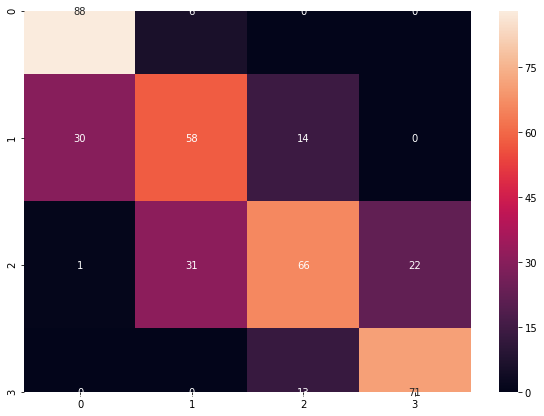

In [120]:
from sklearn.metrics import classification_report,confusion_matrix

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_std_df, y_train)
pred = knn.predict(X_test_std_df)

print(knn.score(X_test_std_df,y_test))
print(classification_report(y_test,pred))

matrix=confusion_matrix(y_test,pred)
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

### SVM

0.9625
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        94
           1       0.93      0.98      0.96       102
           2       0.98      0.92      0.95       120
           3       0.94      0.99      0.97        84

    accuracy                           0.96       400
   macro avg       0.96      0.97      0.96       400
weighted avg       0.96      0.96      0.96       400



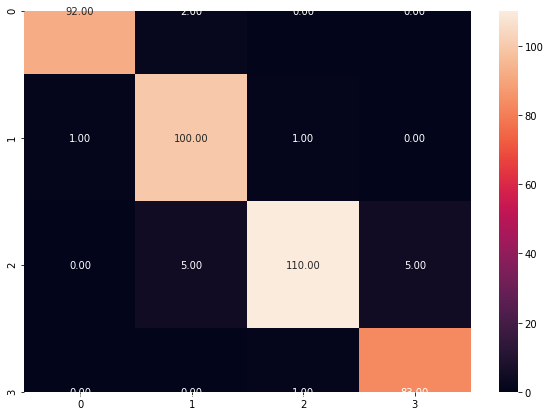

In [121]:
svm = SVC(kernel='linear',C=best_c)
svm.fit(X_train_std_df, y_train)
pred = svm.predict(X_test_std_df)

print(svm.score(X_test_std_df,y_test))
print(classification_report(y_test,pred))

matrix=confusion_matrix(y_test,pred)
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True,fmt=".2f")

### References
- https://www.kaggle.com/azzion/svm-for-beginners-tutorial
- https://www.kaggle.com/vikramb/mobile-price-prediction/notebook
- https://www.kaggle.com/nirajvermafcb/support-vector-machine-detail-analysis